In [1]:
import pandas as pd
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib.patches import Rectangle
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
# Initialize dictionaries for predictions and targets, separated by trait
bird_predictions_by_trait_gemini = {}
bird_targets_by_trait_gemini = {}

# Counter for null responses
null_count_gemini = 0

# Load and process Gemini data
with open("task5a/final_task5a_v1_gemini_responses.json", 'r') as infile:
    gemini_bird_responses = json.load(infile)

for key, value in gemini_bird_responses.items():
    # Split the key to extract the trait
    inat_id, trait = key.split('_')
    
    response = value['response']
    
    # Check if response is None (null) and skip it if so
    if response is None:
        null_count_gemini += 1
        continue  # Skip null responses
    
    # Clean the response and convert to float if it's not None
    response = float(response.strip().split()[0])  # be lenient if model says '30 mm'
    correct_answer = value['correct_answers']
    
    # Add the response and correct answer to the corresponding trait's list
    if trait not in bird_predictions_by_trait_gemini:
        bird_predictions_by_trait_gemini[trait] = []
        bird_targets_by_trait_gemini[trait] = []
    
    bird_predictions_by_trait_gemini[trait].append(response)
    bird_targets_by_trait_gemini[trait].append(correct_answer)

print(f"Number of null responses in Gemini data: {null_count_gemini}")

# Initialize dictionaries for GPT predictions and targets, separated by trait
bird_predictions_by_trait_gpt = {}
bird_targets_by_trait_gpt = {}

# Counter for null responses
null_count_gpt = 0

# Load and process GPT data
with open("task5a/final_task5a_v1_gpt_responses.json", 'r') as infile:
    gpt_bird_responses = json.load(infile)

for key, value in gpt_bird_responses.items():
    # Split the key to extract the trait
    inat_id, trait = key.split('_')
    
    response = value['response']
    
    # Check if response is None (null) and skip it if so
    if response is None:
        null_count_gpt += 1
        continue  # Skip null responses
    
    # Clean the response and convert to float if it's not None
    response = float(response.strip().split()[0])  # be lenient if model says '30 mm'
    correct_answer = value['correct_answers']
    
    # Add the response and correct answer to the corresponding trait's list
    if trait not in bird_predictions_by_trait_gpt:
        bird_predictions_by_trait_gpt[trait] = []
        bird_targets_by_trait_gpt[trait] = []
    
    bird_predictions_by_trait_gpt[trait].append(response)
    bird_targets_by_trait_gpt[trait].append(correct_answer)

print(f"Number of null responses in GPT data: {null_count_gpt}")

print("Gemini Predictions by Trait:", bird_predictions_by_trait_gemini)
print("Gemini Targets by Trait:", bird_targets_by_trait_gemini)
print("GPT Predictions by Trait:", bird_predictions_by_trait_gpt)
print("GPT Targets by Trait:", bird_targets_by_trait_gpt)


Number of null responses in Gemini data: 4
Number of null responses in GPT data: 0
Gemini Predictions by Trait: {'beak length': [40.0, 20.0, 40.0, 25.5, 10.5, 14.0, 11.0, 16.5, 40.0, 38.5, 11.5, 40.0, 40.0, 30.0, 10.0, 65.0, 30.0, 45.0, 10.5, 42.0, 56.0, 40.0, 11.5, 42.5, 40.0, 12.5, 10.5, 13.5, 13.5, 40.5, 40.0, 30.0, 11.0, 20.5, 14.5, 43.2, 28.5, 13.5, 18.5, 16.5, 16.5, 30.0, 10.0, 10.5, 44.5, 35.5, 11.5, 42.0, 40.0, 10.0, 12.5, 30.0, 22.0, 14.3, 20.5, 20.0, 28.0, 22.5, 13.5, 50.0, 48.5, 11.0, 20.0, 42.5, 20.5, 40.0, 40.0, 30.0, 13.5, 82.5, 13.5, 40.5, 40.0, 40.0, 42.0, 50.0, 30.0, 15.75, 38.5, 10.0, 25.5, 10.0, 40.0, 19.5, 17.5, 17.0, 10.5, 18.0, 20.0, 12.5, 30.0, 40.0, 10.5, 70.0, 32.0, 20.5, 19.5, 22.0, 22.0], 'wing length': [280.0, 145.0, 90.0, 75.0, 95.0, 65.0, 60.0, 30.0, 155.0, 340.0, 65.0, 180.0, 68.0, 90.0, 45.0, 650.0, 200.0, 135.0, 63.0, 235.0, 685.0, 300.0, 65.0, 127.0, 300.0, 60.0, 62.5, 48.0, 67.0, 100.0, 170.0, 290.0, 80.0, 107.0, 150.0, 180.0, 107.0, 55.0, 75.0, 90.0,

In [ ]:
# Initialize dictionaries for predictions and targets, separated by trait
mammal_predictions_by_trait_gemini = {}
mammal_targets_by_trait_gemini = {}

# Counter for null and invalid responses
null_count_gemini_mammal = 0
invalid_count_gemini_mammal = 0

# Load and process Gemini data for mammals
with open("task5b/final_task5b_v1_gemini_responses.json", 'r') as infile:
    gemini_mammal_responses = json.load(infile)

for key, value in gemini_mammal_responses.items():
    # Split the key to extract the trait
    inat_id, trait = key.split('_')
    
    response = value['response']
    
    # Check if response is None (null) and skip it if so
    if response is None:
        null_count_gemini_mammal += 1
        continue  # Skip null responses
    
    try:
        # Clean the response and convert to float, handle '30 mm' case
        response = float(response.strip().split()[0].replace(',', ''))
    except ValueError:
        # Handle invalid responses like '50-60'
        invalid_count_gemini_mammal += 1
        continue  # Skip invalid responses
    
    correct_answer = value['correct_answers']
    
    # Add the response and correct answer to the corresponding trait's list
    if trait not in mammal_predictions_by_trait_gemini:
        mammal_predictions_by_trait_gemini[trait] = []
        mammal_targets_by_trait_gemini[trait] = []
    
    mammal_predictions_by_trait_gemini[trait].append(response)
    mammal_targets_by_trait_gemini[trait].append(correct_answer)

print(f"Number of null responses in Gemini mammal data: {null_count_gemini_mammal}")
print(f"Number of invalid responses in Gemini mammal data: {invalid_count_gemini_mammal}")

# Initialize dictionaries for GPT predictions and targets, separated by trait
mammal_predictions_by_trait_gpt = {}
mammal_targets_by_trait_gpt = {}

# Counter for null and invalid responses
null_count_gpt_mammal = 0
invalid_count_gpt_mammal = 0

# Load and process GPT data for mammals
with open("task5b/final_task5b_v1_gpt_responses.json", 'r') as infile:
    gpt_mammal_responses = json.load(infile)

for key, value in gpt_mammal_responses.items():
    # Split the key to extract the trait
    inat_id, trait = key.split('_')
    
    response = value['response']
    
    # Check if response is None (null) and skip it if so
    if response is None:
        null_count_gpt_mammal += 1
        continue  # Skip null responses
    
    try:
        # Clean the response and convert to float, handle '30 mm' case
        response = float(response.strip().split()[0].replace(',', ''))
    except ValueError:
        # Handle invalid responses like '50-60'
        invalid_count_gpt_mammal += 1
        continue  # Skip invalid responses
    
    correct_answer = value['correct_answers']
    
    # Add the response and correct answer to the corresponding trait's list
    if trait not in mammal_predictions_by_trait_gpt:
        mammal_predictions_by_trait_gpt[trait] = []
        mammal_targets_by_trait_gpt[trait] = []
    
    mammal_predictions_by_trait_gpt[trait].append(response)
    mammal_targets_by_trait_gpt[trait].append(correct_answer)

print(f"Number of null responses in GPT mammal data: {null_count_gpt_mammal}")
print(f"Number of invalid responses in GPT mammal data: {invalid_count_gpt_mammal}")

print("Gemini Mammal Predictions by Trait:", mammal_predictions_by_trait_gemini)
print("Gemini Mammal Targets by Trait:", mammal_targets_by_trait_gemini)
print("GPT Mammal Predictions by Trait:", mammal_predictions_by_trait_gpt)
print("GPT Mammal Targets by Trait:", mammal_targets_by_trait_gpt)


Number of null responses in Gemini mammal data: 4
Number of invalid responses in Gemini mammal data: 1
Number of null responses in GPT mammal data: 0
Number of invalid responses in GPT mammal data: 0
Gemini Mammal Predictions by Trait: {'adult body length': [760.0, 585.0, 950.0, 80.0, 250.0, 750.0, 66.0, 86.0, 850.0, 1300.0, 190.0, 200.0, 935.0, 2000.0, 200.0, 145.0, 450.0, 500.0, 280.0, 200.0, 400.0, 47.0, 435.0, 160.0, 500.0, 250.0, 95.0, 450.0, 330.0, 165.0, 1800.0, 130.0, 44.0, 160.0, 1300.0, 89.0, 350.0, 250.0, 73.0, 750.0, 550.0, 850.0, 45.0, 750.0, 400.0, 450.0, 650.0, 320.0, 450.0, 275.0, 135.0, 130.0, 200.0, 200.0, 90.0, 2700.0, 2000.0, 600.0, 120.0, 350.0, 185.0, 750.0, 500.0, 165.0, 62.5, 198.0, 67.0, 230.0, 850.0, 420.0, 350.0, 2800.0, 47.0, 82.0, 120.0, 750.0, 97.0, 500.0, 280.0, 650.0, 70.0, 75.0, 670.0, 90.0, 400.0, 860.0, 200.0, 500.0, 240.0, 95.0, 1800.0, 750.0, 1900.0, 350.0, 45.0, 300.0, 82.0, 500.0, 305.0], 'gestation length': [33.0, 36.0, 240.0, 21.0, 57.0, 210.0, 

In [37]:
trait_units = {
    "beak length": "mm",
    "wing length": "mm",
    "tail length": "mm",
    "mass": "g",
    "adult body length": "mm",
    "gestation length": "days",
    "max longevity": "days",
    "adult mass": "g"
}

In [44]:
# Subset data for this trait (Gemini)
targets = np.array(bird_targets_by_trait_gemini["wing length"])
predictions_gemini = np.array(bird_predictions_by_trait_gemini["wing length"])

In [53]:
import numpy as np
from sklearn.metrics import r2_score

# Define the arrays
y_true = np.array([280. , 145. , 90. , 75. , 95. , 65. , 60. , 30. , 155. , 340. , 65. , 180. , 68. , 90. , 45. , 650. , 200. , 135. , 63. , 235. , 685. , 300. , 65. , 127. , 300. , 60. , 62.5, 48. , 67. , 100. , 170. , 290. , 80. , 107. , 150. , 180. , 107. , 55. , 75. , 90. , 200. , 450. , 48. , 63. , 107. , 390. , 65. , 155. , 125. , 45.5, 60. , 290. , 115. , 68. , 107. , 90. , 150. , 135. , 93. , 450. , 275. , 90. , 90. , 240. , 75. , 107. , 1600. , 127. , 48. , 750. , 48. , 137. , 92. , 300. , 435. , 280. , 90. , 67. , 380. , 70. , 137. , 95. , 350. , 135. , 67. , 100. , 45. , 68. , 270. , 45. , 240. , 115. , 67.5, 397.5, 285. , 70. , 90. , 450. , 140. ])
y_pred = np.array([111.8, 105.2, 93.6, 142. , 99.4, 72.2, 59.8, 33. , 155.8, 194.8, 70.8, 163.6, 91.9, 110.4, 52.1, 566.6, 117.2, 149.2, 106.4, 201.8, 223.5, 217.4, 71.3, 119.5, 201.4, 54.9, 57.9, 94.4, 89.5, 78.2, 156. , 129.9, 85.9, 81. , 151.2, 100.5, 75.8, 54.1, 87. , 104.8, 106.7, 471.2, 52. , 92.1, 81.1, 362.3, 60.2, 173. , 93.8, 39.8, 58.9, 145.2, 126.4, 76.9, 89.6, 138.8, 153.7, 136.1, 119. , 381.1, 351.2, 70.1, 145.8, 192.3, 100.8, 90. , 508.5, 111.8, 65. , 615.5, 53. , 117. , 93.6, 216.1, 472.6, 155.4, 68.8, 69. , 341.2, 69.4, 121.7, 101.2, 285.9, 128.4, 61.6, 93.8, 52. , 68.6, 160.6, 54.9, 173.1, 102.6, 64.8, 322.2, 222. , 100.5, 92.7, 277.6, 129.9])

# Compute R² score
r2 = r2_score(targets, predictions_gemini)
r2


-0.30666533089765413

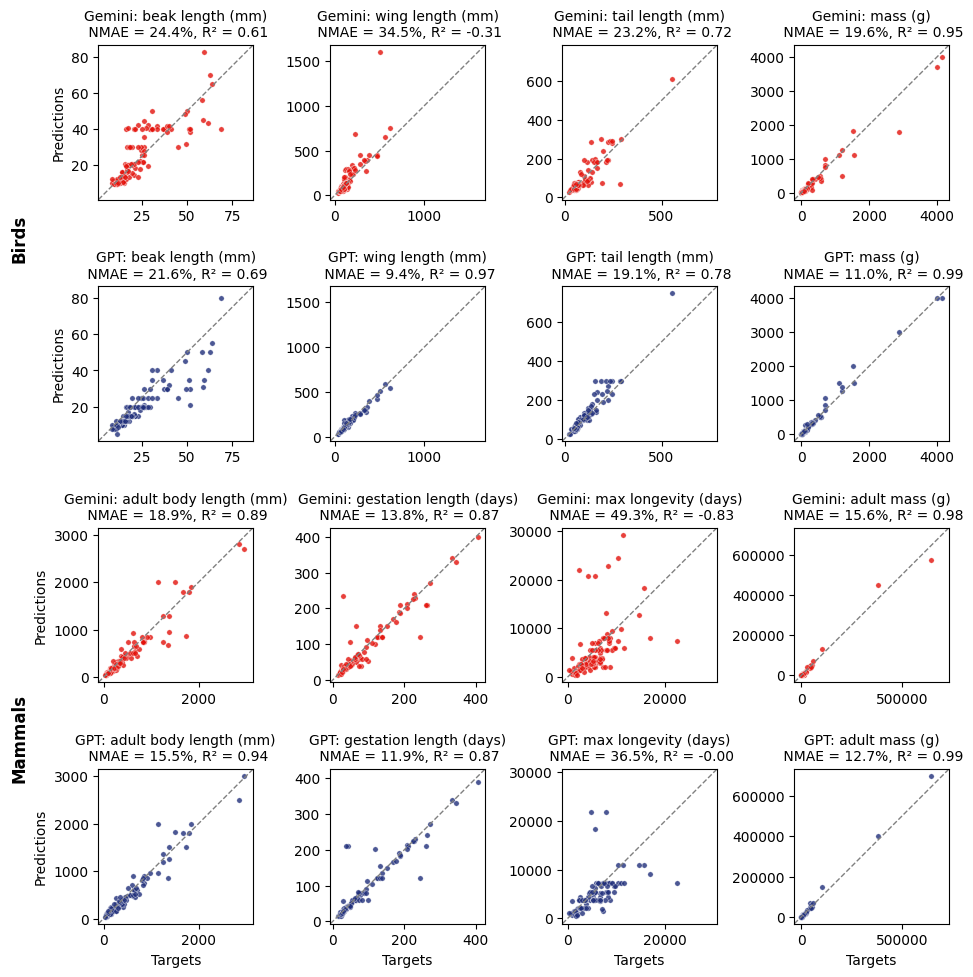

In [59]:
# Plot setup
fig, axes = plt.subplots(4, 4, figsize=(9.5, 10))  # 2 rows (Gemini and GPT), 4 columns (one per trait)
axes = axes.flatten()

axis_min, axis_max = 0, 1.05  # Slightly beyond [0, 1]

# Traits to plot
bird_traits = ["beak length", "wing length", "tail length", "mass"]
mammal_traits = ["adult body length", "gestation length", "max longevity", "adult mass"]
percentage_range = 0.05

# Shared row titles
fig.text(0, 0.75, 'Birds', va='center', ha='center', rotation='vertical', fontsize=12, fontweight='bold')
fig.text(0, 0.25, 'Mammals', va='center', ha='center', rotation='vertical', fontsize=12, fontweight='bold')

# Loop through each trait for Gemini and GPT
for i, trait in enumerate(bird_traits):
    unit = trait_units.get(trait, '')  # Get the unit, default to empty if not found
    ax_gemini = axes[i]
    
    # Subset data for this trait (Gemini)
    targets = np.array(bird_targets_by_trait_gemini[trait])
    predictions_gemini = np.array(bird_predictions_by_trait_gemini[trait])
    
    # Calculate NMAE and R² for Gemini
    nmae_gemini = 100 * (mean_absolute_error(targets, predictions_gemini) / np.mean(targets))
    r2_gemini = r2_score(targets, predictions_gemini)
    
    # Scatter plot for Gemini
    sns.scatterplot(x=targets, y=predictions_gemini, ax=ax_gemini, s=15, alpha=0.8, color="#E3120B")

    if i == 0:
        ax_gemini.set_ylabel('Predictions')
    else:
        ax_gemini.set_ylabel('')  # Remove redundant y-label for columns 2 to 4
        
    ax_gemini.set_title(f'Gemini: {trait} ({unit})\n NMAE = {nmae_gemini:.1f}%, R² = {r2_gemini:.2f}', fontsize=10)
    
    # Set square aspect ratio
    ax_gemini.set_aspect('equal', adjustable='box')

    # Bottom row (GPT predictions)
    ax_gpt = axes[i + 4]  # Shift to next row of plots
    
    # Subset data for this trait (GPT)
    predictions_gpt = np.array(bird_predictions_by_trait_gpt[trait])
    targets = np.array(bird_targets_by_trait_gpt[trait])
        
    # Calculate NMAE and R² for GPT
    nmae_gpt = 100 * (mean_absolute_error(targets, predictions_gpt) / np.mean(targets))
    r2_gpt = r2_score(targets, predictions_gpt)
    
    # Scatter plot for GPT with kernel density estimation (KDE)
    sns.scatterplot(x=targets, y=predictions_gpt, ax=ax_gpt, s=15, alpha=0.8, color="#1F2E7A")

    if i == 0:
        ax_gpt.set_ylabel('Predictions')
    else:
        ax_gpt.set_ylabel('')  # Remove redundant y-label for columns 2 to 4
    
    ax_gpt.set_xlabel('Targets')  # Keep x-label only for GPT row
    ax_gpt.set_title(f'GPT: {trait} ({unit})\n NMAE = {nmae_gpt:.1f}%, R² = {r2_gpt:.2f}', fontsize=10)
    ax_gpt.set_aspect('equal', adjustable='box')

    #set boundaries:
    # Calculate the overall min and max
    overall_min = min(np.min(targets), np.min(predictions_gemini), np.min(predictions_gpt))
    overall_max = max(np.max(targets), np.max(predictions_gemini), np.max(predictions_gpt))
    
    # Calculate the range
    data_range = overall_max - overall_min
    
    # Calculate the axis limits based on the percentage of the range
    axis_min = overall_min - (percentage_range * data_range)
    axis_max = overall_max + (percentage_range * data_range)
    
    # Plot diagonal reference line (y = x)
    ax_gemini.plot([axis_min, axis_max], [axis_min, axis_max], '--', color='gray', linewidth=1)
    
    # Formatting for Gemini
    ax_gemini.set_xlim([axis_min, axis_max])
    ax_gemini.set_ylim([axis_min, axis_max])
    ax_gemini.set_xlabel('')

    # Plot diagonal reference line (y = x)
    ax_gpt.plot([axis_min, axis_max], [axis_min, axis_max], '--', color='gray', linewidth=1)

    # Formatting for Gemini
    ax_gpt.set_xlim([axis_min, axis_max])
    ax_gpt.set_ylim([axis_min, axis_max])
    ax_gpt.set_xlabel('')

# Add mammal data (Gemini and GPT)
for i, trait in enumerate(mammal_traits):
    unit = trait_units.get(trait, '')  # Get the unit, default to empty if not found
    # Third row (Gemini predictions for mammals)
    ax_gemini = axes[i + 8]  # Move to third row for Gemini
    
    # Subset data for this trait (Gemini - mammals)
    targets = np.array(mammal_targets_by_trait_gemini[trait])
    predictions_gemini = np.array(mammal_predictions_by_trait_gemini[trait])
   
    # Calculate NMAE and R² for Gemini (mammals)
    nmae_gemini = 100 * (mean_absolute_error(targets, predictions_gemini) / np.mean(targets))
    r2_gemini = r2_score(targets, predictions_gemini)
    
    # Scatter plot for Gemini (mammals)
    sns.scatterplot(x=targets, y=predictions_gemini, ax=ax_gemini, s=15, alpha=0.8, color="#E3120B")

    if i == 0:
        ax_gemini.set_ylabel('Predictions')
    ax_gemini.set_title(f'Gemini: {trait} ({unit})\n NMAE = {nmae_gemini:.1f}%, R² = {r2_gemini:.2f}', fontsize=10)
    ax_gemini.set_aspect('equal', adjustable='box')

    # Fourth row (GPT predictions for mammals)
    ax_gpt = axes[i + 12]  # Move to fourth row for GPT
    
    # Subset data for this trait (GPT - mammals)
    targets = np.array(mammal_targets_by_trait_gpt[trait])
    predictions_gpt = np.array(mammal_predictions_by_trait_gpt[trait])
    
    
    # Calculate NMAE and R² for GPT (mammals)
    nmae_gpt = 100 * (mean_absolute_error(targets, predictions_gpt) / np.mean(targets))
    r2_gpt = r2_score(targets, predictions_gpt)
    
    # Scatter plot for GPT (mammals)
    sns.scatterplot(x=targets, y=predictions_gpt, ax=ax_gpt, s=15, alpha=0.8, color="#1F2E7A")
    
    # Calculate the overall min and max
    overall_min = min(np.min(targets), np.min(predictions_gemini), np.min(predictions_gpt))
    overall_max = max(np.max(targets), np.max(predictions_gemini), np.max(predictions_gpt))
    
    # Calculate the range
    data_range = overall_max - overall_min
    
    # Calculate the axis limits based on the percentage of the range
    axis_min = overall_min - (percentage_range * data_range)
    axis_max = overall_max + (percentage_range * data_range)
    
    # Plot diagonal reference line (y = x)
    ax_gemini.plot([axis_min, axis_max], [axis_min, axis_max], '--', color='gray', linewidth=1)
    
    # Formatting for Gemini
    ax_gemini.set_xlim([axis_min, axis_max])
    ax_gemini.set_ylim([axis_min, axis_max])
    ax_gemini.set_xlabel('')
    
    # Plot diagonal reference line (y = x)
    ax_gpt.plot([axis_min, axis_max], [axis_min, axis_max], '--', color='gray', linewidth=1)
    
    # Formatting for Gemini
    ax_gpt.set_xlim([axis_min, axis_max])
    ax_gpt.set_ylim([axis_min, axis_max])
    ax_gpt.set_xlabel('')

    ax_gpt.set_xlabel('Targets')
    if i == 0:
        ax_gpt.set_ylabel('Predictions')
    ax_gpt.set_title(f'GPT: {trait} ({unit})\n NMAE = {nmae_gpt:.1f}%, R² = {r2_gpt:.2f}', fontsize=10)
    ax_gpt.set_aspect('equal', adjustable='box')

# Final plot adjustments
plt.tight_layout()
plt.savefig('plots/task6_traits.pdf', format='pdf', bbox_inches='tight')
plt.show()
